<a href="https://colab.research.google.com/github/gkrry2723/MLclassroom_hw/blob/main/MLassignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning 과제 05 **
20184754 김현주

1. Plot the training data

plot the training data points (x,y) with their labels lll in colors (blue for label 0 and red for label 1)

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


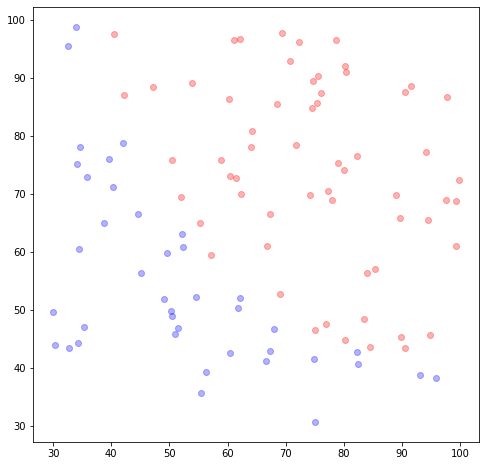

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#데이터 불러오기
data    = np.genfromtxt("/gdrive/My Drive/ML_assignment/data.txt", delimiter=',')

label_0=[]
label_1=[]
label=[]
x=[]
y=[]

#데이터 라벨 구분하기
for i in range(0, len(data)):
  x.append(data[i][0])
  y.append(data[i][1])
  label.append(data[i][2])
  temp=[data[i][0],data[i][1]]

  if (data[i][2]==0) :
    label_0.append(temp)
  else :
    label_1.append(temp)

#데이터 plot 하기    
plt.figure(figsize=(8, 8))
for i in range(0,len(label_0)):
  plt.scatter(label_0[i][0], label_0[i][1], alpha=0.3, c='b')
for i in range(0,len(label_1)):
  plt.scatter(label_1[i][0], label_1[i][1], alpha=0.3, c='r')
plt.show()


2. Plot the estimated parameters 
- plot the estimated parameters (θ0,θ1,θ2) at every iteration of gradient descent until convergence
- the colors for the parameters (θ0,θ1,θ2)should be red, green, blue, respectively



[-3.48743652  0.03612857  0.02705006]


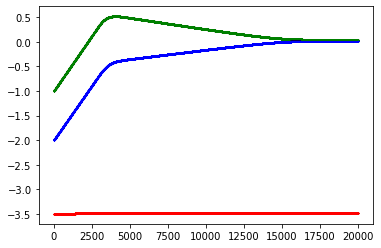

In [ ]:
import math

#그래프에서 잘보이도록 + converge 까지 도달하는 시간을 고려해서 초기값 initialize
theta0=-3.5
theta1=-1
theta2=-2
theta=np.array([theta0,theta1,theta2])

p=0.00001
step=0

for i in range(0,20000):
  step=step+1

  s=0
  s1=0
  s2=0
  for i in range(0,len(data)):
    vector=np.array([1,x[i],y[i]])
    sigma=np.dot(np.transpose(theta),vector)
    h=1/(1+math.exp(-sigma))
    
    s=(h-label[i]) + s
    s1=(h-label[i])*x[i] +s1
    s2=(h-label[i])*y[i] +s2

  theta0= theta0-p*s/(len(data))
  theta1= theta1-p*s1/(len(data))
  theta2= theta2-p*s2/(len(data))
  theta=np.array([theta0,theta1,theta2])

  plt.scatter(step,theta0,c="red",s=0.3)
  plt.scatter(step,theta1,c="green",s=0.3)
  plt.scatter(step,theta2,c="blue",s=0.3)

print(theta)

** Plot the training error**

- plot the training error J(θ0,θ1,θ2)at every iteration of gradient descent until convergence (in blue color)

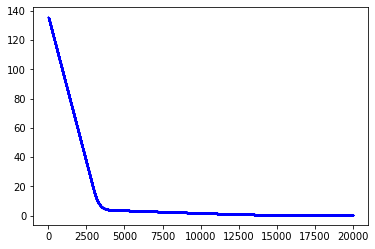

In [ ]:
import math

theta00=-3.5
theta11=-1
theta22=-2
theta=np.array([theta00,theta11,theta22])


p=0.00001
step=0


for i in range(0,20000):
  step=step+1
  s=0
  s1=0
  s2=0

  sum=0

  for i in range(0,len(data)):
    vector=np.array([1,x[i],y[i]])
    sigma=np.dot(np.transpose(theta),vector)
    h=1/(1+math.exp(-sigma))
    
    s=(h-label[i]) + s
    s1=(h-label[i])*x[i] +s1
    s2=(h-label[i])*y[i] +s2
    sum=label[i]*math.log(h)+(1-label[i])*math.log(1-h) + sum
  
  theta00= theta00-p*s/(len(data))
  theta11= theta11-p*s1/(len(data))
  theta22= theta22-p*s2/(len(data))
  
  theta=np.array([theta00,theta11,theta22])

  #J값 계산
  J= -sum/len(data)

  plt.scatter(step,J,c="blue",s=0.3)



** Plot the obtained classifier **

- plot the classifier σ(z)where z = theta_0 + theta_1 x + theta_2 y with x = [30 : 0.5 : 100] and y = [30 : 0.5 : 100]

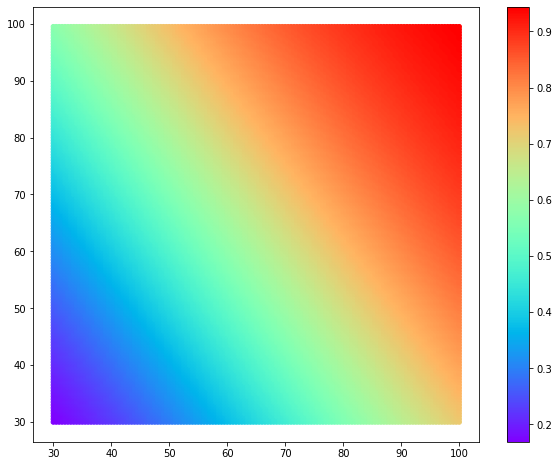

In [ ]:
xlist=[]
ylist=[]
slist=[]
x=30

#반복문을 통해 x,y값에 따른 sigma 값 도출
while x<=100:
  y=30

  while y<100:
    z= theta0+theta1*x+theta2*y
    sigma=1/(1+math.exp(-z))
    xlist.append(x)
    ylist.append(y)
    slist.append(sigma)

    y=y+0.5
    y=round(y,1)
      
  x=x+0.5
  x=round(x,1)

plt.figure(figsize=(10,8))
scat=plt.scatter(xlist,ylist,c=slist,cmap='rainbow',s=20)
plt.colorbar(scat)
for i in range(0,len(label_0)):
  plt.scatter(label_0[i][0], label_0[i][1], alpha=0.3, c='b')
for i in range(0,len(label_1)):
  plt.scatter(label_1[i][0], label_1[i][1], alpha=0.3, c='r')